<a href="https://colab.research.google.com/github/leobioinf0/233_Introduccion_a_la_ciencia_de_datos/blob/main/3_4_REPRESENTACION_GRAFICA_DE_LOS_DATOS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# REPRESENTACIÓN GRÁFICA DE LOS DATOS

Teniendo en cuenta la tabla de datos que te puedes descargar en formato CSV a través del siguiente enlace, responde a las siguientes cuestiones:

Nota: para resolver las cuestiones, debes importar los módulos de Pandas, Matplotlib.pyplot y Seaborn.

1)
- Qué región tiene la observación 4? 
- Qué valor bmi muestra la observación 2? 
- La observación 3 tiene sexo femenino o masculino? 
- ¿Cuánto (charge) tiene la observación 1?

2)
- Cuántas observaciones (count) hay en la mesa? 
- ¿Cuál es la desviación std de la columna bmi? 
- ¿Cuál es el coste (charges) mínimo que tiene la mesa? 
- ¿Cuál es el número máximo de hijos o hijas que puede tener una observación concreta?

3)
- Genera un histograma para la variable edades (age) y la variable coste (charge).

4)
- Haz un gráfico de dispersión del coste (charges) ante bmi y diferencia los puntos obtenidos, dependiendo, primero, de si la persona es fumadora o no y, después, de si es de sexo masculino o femenino.

5)
- Crea un gráfico de dispersión de los valores bmi en relación, primero, con el número de hijos o hijas (children) y, después, con el sexo y, finalmente, con si fuma o no. Ten presente que hay una función específica para crear gráficos de dispersión en los que una variable es categórica. El número de hijos o hijas, el sexo y si fuma o no lo son.

Una vez hemos cargado correctamente la base de datos y hemos importado los módulos necesarios, podemos empezar a resolver las cuestiones.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
file_path = ('./insurance.csv')
insurance_data = pd.read_csv (file_path)

1)
- Qué región tiene la observación 4? 
- Qué valor bmi muestra la observación 2? 
- La observación 3 tiene sexo femenino o masculino? 
- ¿Cuánto (charge) tiene la observación 1?

In [2]:
insurance_data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


- la observación 4 pertenece a la región northwest, 
- la observación 2 tiene un bmi de 33.000, 
- la observación 3 es del sexo femenino
- la observación 1 tiene un coste de 1.725,55.

2)
- Cuántas observaciones (count) hay en la mesa? 
- ¿Cuál es la desviación std de la columna bmi? 
- ¿Cuál es el coste (charges) mínimo que tiene la mesa? 
- ¿Cuál es el número máximo de hijos o hijas que puede tener una observación concreta?

In [3]:
insurance_data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


- el número de observaciones (count) es de 1.338. 
- La desviación (std) de los valores bmi es de 6.09, 
- el coste (charge) mínimo que aparece en la tabla es 1121,87
- el número máximo de hijos o hijas que se puede ver en una observación es 5.

3)
- Genera un histograma para la variable edades (age) y la variable coste (charge).

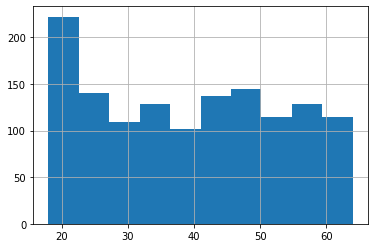

In [4]:
insurance_data['age'].hist()

Aquí vemos, pues, que la distribución de la población está bastante equilibrada, salvo la edad que está alrededor de los 20 años, que muestra una población significativamente mayor que el resto.

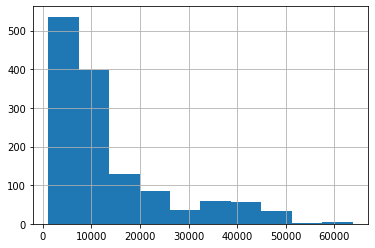

In [5]:
insurance_data['charges'].hist()

Podemos ver que la gran parte de los seguros tienen un coste por debajo del valor de 10.000.

4)
- Haz un gráfico de dispersión del coste (charges) ante bmi y diferencia los puntos obtenidos, dependiendo, primero, de si la persona es fumadora o no y, después, de si es de sexo masculino o femenino.

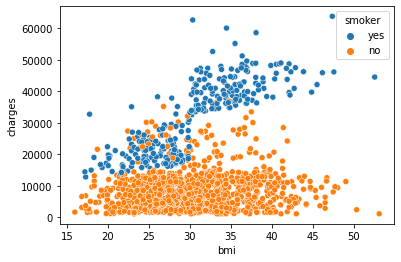

In [6]:
sns.scatterplot (x = insurance_data ['bmi'], y = insurance_data ['charges'],
                 hue = insurance_data ['smoker'])

Los dos colores diferentes identifican si el punto pertenece a una persona fumadora o no. Para hacer el segundo gráfico, aquel que debe mostrar los puntos de diferentes colores dependiendo del sexo, tengo que cambiar el valor del parámetro hue:

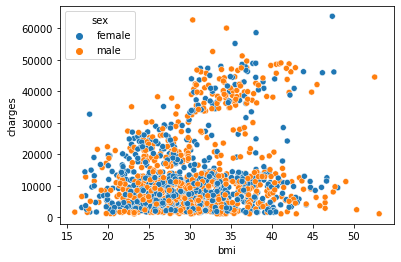

In [7]:
sns.scatterplot (x = insurance_data['bmi'], y = insurance_data['charges'],
                 hue = insurance_data ['sex'])

En el primer gráfico, se ve claramente que, para un valor de bmi, el coste es superior cuando la persona es fumadora. Esta relación no se ve en el caso del sexo. Parece que el sexo, pues, no afecte al coste para un bmi dado. En cualquier caso, sin embargo, podemos proyectar una recta de regresión para ver si realmente el sexo puede ocasionar ninguna relevancia. Recuerda que tenemos que utilizar la función lmplot() del módulo Seaborn. Escribimos el código:

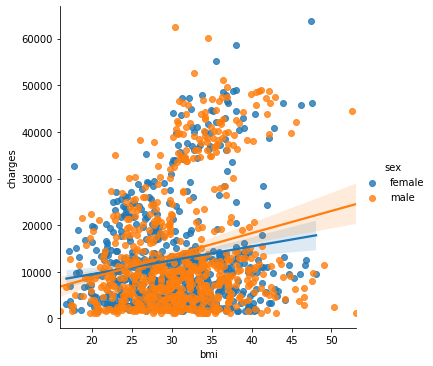

In [8]:
sns.lmplot(x="bmi", y="charges", hue="sex", data=insurance_data)


Este gráfico nos muestra que el sexo femenino puede ser más sensible que el sexo masculino al aumento del valor bmi. Esto significa que, para un incremento dado del valor de bmi, el aumento del coste del seguro crecerá un poco más en el sexo femenino que en el masculino.

5)
- Crea un gráfico de dispersión de los valores bmi en relación, primero, con el número de hijos o hijas (children) y, después, con el sexo y, finalmente, con si fuma o no. Ten presente que hay una función específica para crear gráficos de dispersión en los que una variable es categórica. El número de hijos o hijas, el sexo y si fuma o no lo son.

Por último, vamos a crear gráficos de dispersión para ver los valores de bmi ante variables categóricas. Empezamos por la variable del número de hijos o hijas (children). Escribimos este código:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 61.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 41.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 28.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 14.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


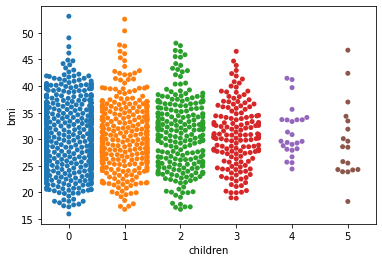

In [9]:
sns.swarmplot (x = insurance_data['children'], y=insurance_data['bmi'])

Aquí vemos, por ejemplo que, desde 2 hasta 4 hijos o hijas, el rango de bmi se hace cada vez más estrecho.
Seguimos con el mismo gráfico de dispersión, pero ahora los valores de bmi los pondremos en relación con el sexo. Este es el código:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 18.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 21.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


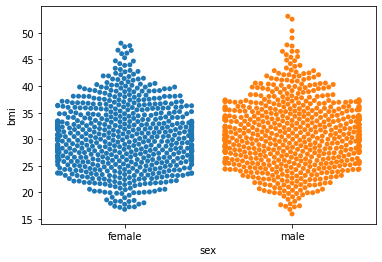

In [10]:
sns.swarmplot (x = insurance_data['sex'], y=insurance_data['bmi'])

Bueno, el gráfico nos enseña que los valores mayores de bmi son del sexo masculino. También podemos ver que los extremos de los valores de bmi, tan máximo como mínimo, tienen forma de flecha. Esto quiere decir que, a medida que nos acercamos a los extremos, el número de observaciones disminuye. En cambio, el sexo femenino no muestra esta forma de flecha tan pronunciada. Esto quiere decir que, a medida que nos acercamos a los extremos, el número de observaciones, aunque disminuye, no tiene una forma tan marcada.

En cuanto al valor bmi en relación con si la persona es fumadora o no, basta con volver a cambiar la variable que compondrá el eje x. El código será:

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 39.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


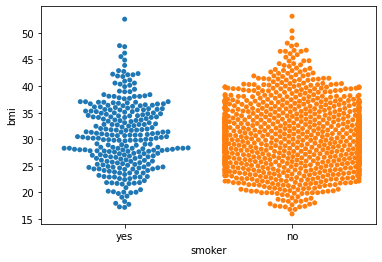

In [11]:
sns.swarmplot(x=insurance_data['smoker'], y=insurance_data['bmi'])

Lo primero que vemos claramente es que el número de observaciones que corresponden a personas no fumadoras es bastante mayor que el de las fumadoras. Aparte de eso, no se ve, en un primer momento, que el sexo afecte a los valores de bmi.